###Scrapping Data

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np


In [ ]:
from google_play_scraper import Sort, reviews

hasil, continuation_token = reviews ('com.grabtaxi.passenger',lang = 'id', country = 'id',
                 sort = Sort.NEWEST, count = 7000,
                 filter_score_with= None)

In [ ]:
df_data = pd.DataFrame(np.array(hasil), columns=['review'])

df_data = df_data.join(pd.DataFrame(df_data.pop('review').tolist()))
df_data.sample(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
3826,8fc58a08-b2db-44c4-8243-78ff877e2c2c,Wanda Fara,https://play-lh.googleusercontent.com/a-/AD5-W...,bisa digunakan ketika urgent butuh kendaraan,5,0,5.233.2,2023-01-13 00:23:54,None,NaT
2090,6494ebc0-cd72-4d01-8746-f857a8d63dca,Ujang Toto,https://play-lh.googleusercontent.com/a/AEdFTp...,mantap,5,0,5.237.0,2023-01-22 15:46:15,Hi Kak. Terima kasih sudah jadi pengguna setia...,2023-01-22 22:12:57
5066,c34e2dbf-2176-4b79-bbec-9657cb9908e9,Sumarning Ae,https://play-lh.googleusercontent.com/a/AEdFTp...,App nya gak bisa di buka Minta app nya di upda...,1,0,5.211.0,2023-01-06 01:17:40,"Hai Kak, Mohon maaf atas ketidaknyamanan yg Ka...",2023-01-06 06:49:58
21,69d56e7b-202c-4ccb-b4b5-63b206eeb0fb,Apri Yandi,https://play-lh.googleusercontent.com/a-/AD5-W...,Ngecewain bgt,1,0,5.238.0,2023-02-03 11:04:06,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2023-02-03 14:41:18
3883,3f20ec67-0a6b-4593-a64c-1dc024078191,Andri Gunawan,https://play-lh.googleusercontent.com/a/AEdFTp...,Mantap,5,0,5.236.0,2023-01-12 12:00:10,None,NaT


In [ ]:
len(df_data)

7000

In [ ]:
data = df_data[['at','userName','score','content']]
data.sample(5)

,at,userName,score,content
4637,2023-01-08 06:14:10,Saroni Roni,5,"ramah dan baik,,,semoga dapat Rizki yg banyak ..."
3072,2023-01-17 02:23:00,Muhammad Yunus,5,ter baik bos
1186,2023-01-28 05:09:21,Kindy Indra Perdana,5,👍👍👍👍👍
2871,2023-01-18 07:02:48,EVA WIDIASTUTI,5,membantu banget
5817,2023-01-02 03:58:19,Rama Febry Pratama wijaya,5,Suka


In [ ]:
data_sorted = data.sort_values(by = 'at', ascending =False)
data_sorted.head(5)

,at,userName,score,content
0,2023-02-03 12:40:53,Ibu Diana Rasid Building,5,Good Jobs 👍🏻👍🏻
1,2023-02-03 12:36:37,Nur Aini Rakhmawati,5,Bagus saya suka sekali dengan aplikasinya🥰
2,2023-02-03 12:36:04,Andi Ono,1,Mohon diperbaiki lagi. Sediakan metode pembaya...
3,2023-02-03 12:32:40,Subhan Malolo,5,drivernya baik ..sopan ....trims
4,2023-02-03 12:30:18,nenk nia,5,bagus


In [ ]:
data_sorted.to_excel('Ulasan.xlsx', index = False)

###Preprocessing

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 4.1 MB/s eta 0:00:00


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [ ]:
dt = pd.read_excel('Ulasan.xlsx')
# dt = dt[:100]
dt.head()

,at,userName,score,content
0,2023-02-03 12:40:53,Ibu Diana Rasid Building,5,Good Jobs 👍🏻👍🏻
1,2023-02-03 12:36:37,Nur Aini Rakhmawati,5,Bagus saya suka sekali dengan aplikasinya🥰
2,2023-02-03 12:36:04,Andi Ono,1,Mohon diperbaiki lagi. Sediakan metode pembaya...
3,2023-02-03 12:32:40,Subhan Malolo,5,drivernya baik ..sopan ....trims
4,2023-02-03 12:30:18,nenk nia,5,bagus


In [ ]:
with open('slang.txt', 'r') as data:
    x = []
    y = []
    for line in data:
        p = line.split()
        x.append(p[0])
        y.append(p[1])



In [ ]:
slang = dict(zip(x,y))
slang['good'] = 'bagus'
slangs={'yg':'yang', 'tdk':'tidak', 'pd':'pada', 'mlh':'malah',
'jgn':'jangan', 'jg':'juga', 'tp':'tapi', 'blkg': 'belakang',
'dr':'dari', 'klo':'kalau', 'lg':'lagi','sj':'saja','bwt':'buat','cm':'cuma','sya':'saya','kalo':'kalau',
'kl':'kalau','dg':'dengan','krn':'karena', 'ank':'anak', 'maen':'main','bgt':'banget', 'rp':'rupiah', 'sat' : 'saat', 'sprtinya':'sepertinya','mlm':'malam',
'lbh':'lebih', 'tuju': 'tujuan','mayan' : 'lumayan', 'sat':'saat', 'sgt':'sangat', 'pol' : 'sangat', 'dg':'dengan','sabi':'bisa', 'byk' : 'banyak', 'gw' : 'aku',
'bs':'bisa','oeang':'orang','lemot':'siput','gk':'tidak','forno':'porno','elite':'keren','good':'bagus','nice':'bagus',
'cool':'bagus','suka':'cinta','love':'cinta','burik':'jelek','buriq':'jelek','epic':'bagus','lag':'siput','ok':'mantap','mantul':'mantap','jlek':'jelek','mksih':'hebat','top':'mantap',
'gercep':'cepat','jos':'bagus','sip':'bagus','awesome':'keren','best':'terbaik','mntap':'mantap','mantab':'mantap','sip':'bagus','oke':'bagus','mantul':'mantap','pk':'ok','bgus':'bagus',
'mkzi':'terimakasih','alhamdulillah':'bagus','mkazi':'terimakasih','ngesel':'menyesal','baget':'sanget','biker':'sopir','kenyamanannya':'kenyamanan','respon':'tanggapan','tangap':'tanggap',
'bagis':'bagus','thank you':'terimakasih','terimaksih':'terimakasih'}
slang.update(slangs)

slang

{'7an': 'tujuan',
 '@': 'di',
 'ababil': 'abg',
 'abis': 'habis',
 'acc': 'accord',
 'ad': 'ada',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'adoh': 'aduh',
 'afaik': 'as',
 'aha': 'tertawa',
 'ahaha': 'haha',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajep-ajep': 'dunia',
 'ajj': 'saja',
 'ak': 'saya',
 'aka': 'dikenal',
 'akika': 'aku',
 'akko': 'aku',
 'akkoh': 'aku',
 'akku': 'aku',
 'akuwh': 'aku',
 'akyu': 'aku',
 'alay': 'norak',
 'aljasa': 'asal',
 'alow': 'halo',
 'ama': 'sama',
 'ambilin': 'ambilkan',
 'ambl': 'ambil',
 'ancur': 'hancur',
 'anjir': 'anjing',
 'anjrit': 'anjing',
 'ank': 'anak',
 'anter': 'antar',
 'ap': 'apa',
 'ap2': 'apa-apa',
 'apaan': 'apa',
 'apasih': 'apa',
 'ape': 'apa',
 'apes': 'sial',
 'aplot': 'unggah',
 'aps': 'apa',
 'apva': 'apa',
 'aq': 'saya',
 'aqu': 'aku',
 'aquwh': 'aku',
 'asap': 'sesegera',
 'asbun': 'asal',
 'aseek': 'asyik',
 'aseekk': 'asyik',
 'asek': 'asyik',
 'asekk': 'asyik',
 'aseknya': 'asyiknya',
 'asem': 'asam',
 'asoy': 'a

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()
anti_stem = ['lemot','ok','memuaskan','layanan','maaf','good','nyaman']

In [ ]:
factory = StopWordRemoverFactory()
more_sw = ['tak','jd','per','nya','nd','lot','nan','lah','deh','the','is','yhj','iya','dulu','ap','job','jobs','memang','sangat','papa','mau','jadi',
           'kalau','makin','buat','sama','terus','selalu','sekali','lebih','dong','sat','cuma','mana','banget','padahal','bahkan','car','rb','apk','ovo','sekarang',
           'pelayanan','update','driver','drivernya','aplikasi','terima','titik','order','mud','mh','wao','yh','sngt','kali','sering','kaz','poko','promo','mkzi','promo','kas','kaz',
           'bapak','orang','bpk']
sw = factory.get_stop_words() + more_sw

In [ ]:
hasil_cleaning = []

for kata in dt['content']:
  prep = re.sub(r'\W',' ',str(kata))
  prep = prep.lower()
  prep = re.sub(r'\d+',' ',prep)
  prep = re.sub(r'\s+[a-z]\s+',' ',prep)

  kalimat = prep.split()
  correction = [slang[kata] if kata in slang else kata for kata in kalimat]
  prep = ' '.join(correction)

  pattern = re.compile(r'(.)\1{1,}',re.DOTALL)
  prep = pattern.sub(r'\1',prep)

  hasil_cleaning.append(prep)

In [ ]:
clean = pd.DataFrame(hasil_cleaning,columns = ['Hasil Cleaning'])
clean.to_excel('Hasil Cleaning.xlsx')
clean.head()

,Hasil Cleaning
0,bagus jobs
1,bagus saya cinta sekali dengan aplikasinya
2,mohon diperbaiki lagi sediakan metode pembayar...
3,drivernya baik sopan terima
4,bagus


In [ ]:
hasil_sw = []
for sent in hasil_cleaning:
  temp =[x for x in word_tokenize(sent) if x not in sw]
  prep = ' '.join(temp)
  hasil_sw.append(prep)

In [ ]:
hasilsw = pd.DataFrame(hasil_sw,columns = ['Hasil SW'])
hasilsw.to_excel('Hasil SW.xlsx')
hasilsw.head(5)

,Hasil SW
0,bagus
1,bagus cinta aplikasinya
2,mohon diperbaiki sediakan metode pembayaran li...
3,baik sopan
4,bagus


In [ ]:
hasil_prep = []
hasil_stem = []
for words in hasil_sw:
  words = words.split()
  temp = []

  for word in words:
    if word not in anti_stem:
      temp.append(stemmer.stem(word))
      hasil_stem.append(word)

    else:
      temp.append(word)
      hasil_stem.append(word)

  prep = ' '.join(temp)
  prep = re.sub(r'\s+',' ',prep,flags = re.I)
  hasil_prep.append(prep)
hasil_stem[:10]

['bagus',
 'bagus',
 'cinta',
 'aplikasinya',
 'mohon',
 'diperbaiki',
 'sediakan',
 'metode',
 'pembayaran',
 'linkaja']

In [ ]:
stem = pd.DataFrame(hasil_stem,columns = ["Hasil Stemming"])
stem.to_excel('Hasil Stemming.xlsx',index =False)
stem = pd.read_excel('Hasil Stemming.xlsx')
stem.tail(5)


,Hasil Stemming
25779,mobil
25780,lama
25781,jauh
25782,rumah
25783,bagus


In [ ]:
dt_prep = pd.DataFrame(hasil_prep,columns = ['Hasil Preprocessing'])
dt_prep.to_excel('Hasil Prep.xlsx')
dt_prep.sample(5)

,Hasil Preprocessing
3758,mudah baik keren
768,pilih rute mantap
6593,grab superap mantap
6172,bagus
2942,promonya susah


In [ ]:
dt = pd.read_excel('Hasil Prep.xlsx')
dt['Hasil Preprocessing'].replace('', np.nan, inplace=True)
dt = dt['Hasil Preprocessing']
dt = dt.dropna()
dt

0                                                   bagus
1                                    bagus cinta aplikasi
2       mohon baik sedia metode bayar linkaja mudah pe...
3                                              baik sopan
4                                                   bagus
                              ...                        
6995                                                bagus
6996              baik ramah bantu erti jakarta kasih pak
6997                                                bagus
6998    nyobain naik mobil lumayan tungu mobil lama ja...
6999                                                bagus
Name: Hasil Preprocessing, Length: 6848, dtype: object

### DATA LABELLING

In [ ]:
dicts = pd.read_excel('NRC.xlsx')

In [ ]:
positive=[]
negative=[]

for i in range(1,len(dicts)):
  kata= dicts.iloc[i,1]

  if (dicts.iloc[i,6])==1:
    positive.append(kata)
  if (dicts.iloc[i,7])==1:
    negative.append(kata)

processed_comments= dt
dt_label=[]

for kalimat in processed_comments:
    baris=[]
    baris.append(kalimat)

    f_sentimenpositif=0
    f_sentimennegatif=0

    y= str(kalimat)

    for teks in y.split():
      for j in range(0,len(positive)-1):
        if teks==positive[j]:
          f_sentimenpositif+=1
      for j in range(0,len(negative)-1):
        if teks==negative[j]:
          f_sentimennegatif+=1

    l_sentimenne=0
    l_sentimenp=0
    l_sentimenn=0

    if f_sentimenpositif-f_sentimennegatif==0:
      l_sentimenne=1

    elif f_sentimenpositif-f_sentimennegatif>=0:
        l_sentimenp=1
    else:
      l_sentimenn=1

    baris.append(l_sentimenp)
    baris.append(l_sentimenn)
    baris.append(l_sentimenne)
    dt_label.append(baris)

In [ ]:
data_berlabel=pd.DataFrame(dt_label, columns=['Review','Positif','Negatif','Netral'])
data_berlabel.sample(5)

,Review,Positif,Negatif,Netral
6138,bantu,0,0,1
2984,oke,0,0,1
1763,mantap,1,0,0
2218,simpel cepat wkw,1,0,0
2262,map ribet pilih peta sendiri malesin,1,0,0


In [ ]:
data_berlabel.to_excel('Data Berlabel.xlsx',index = False)

In [ ]:
data_berlabel = pd.read_excel('Data Berlabel.xlsx')
data_berlabel.dropna()
data_berlabel.sample(5)

,Review,Positif,Negatif,Netral
1479,bagus ramah,1,0,0
6725,bagus,1,0,0
350,mantap,1,0,0
2957,kecewa grab lepas tangan barang tertingal aku ...,0,1,0
4950,mudah dimanfatkan cepat murah,1,0,0


In [ ]:
data_berlabel

,Review,Positif,Negatif,Netral
0,bagus,1,0,0
1,bagus cinta aplikasi,1,0,0
2,mohon baik sedia metode bayar linkaja mudah pe...,1,0,0
3,baik sopan,1,0,0
4,bagus,1,0,0
...,...,...,...,...
6843,bagus,1,0,0
6844,baik ramah bantu erti jakarta kasih pak,1,0,0
6845,bagus,1,0,0
6846,nyobain naik mobil lumayan tungu mobil lama ja...,0,0,1


In [ ]:
dt = data_berlabel
dt['label'] = ''
dt

,Review,Positif,Negatif,Netral,label
0,bagus,1,0,0,
1,bagus cinta aplikasi,1,0,0,
2,mohon baik sedia metode bayar linkaja mudah pe...,1,0,0,
3,baik sopan,1,0,0,
4,bagus,1,0,0,
...,...,...,...,...,...
6843,bagus,1,0,0,
6844,baik ramah bantu erti jakarta kasih pak,1,0,0,
6845,bagus,1,0,0,
6846,nyobain naik mobil lumayan tungu mobil lama ja...,0,0,1,


In [ ]:
for i in dt.index:
  if dt.at[i,'Negatif'] == 1:
    dt.at[i,'label'] = -1

  elif dt.at[i,'Positif'] ==1:
    dt.at[i,'label'] = 1

  elif dt.at[i,'Netral'] == 1:
    dt.at[i,'label'] = 0


In [ ]:
dt

,Review,label
0,bagus,1
1,bagus cinta aplikasi,1
2,mohon baik sedia metode bayar linkaja mudah pe...,1
3,baik sopan,1
4,bagus,1
...,...,...
6843,bagus,1
6844,baik ramah bantu erti jakarta kasih pak,1
6845,bagus,1
6846,nyobain naik mobil lumayan tungu mobil lama ja...,0


In [ ]:
positif = dt[dt['label']==1] ['label'].count()
negatif = dt[dt['label']==-1] ['label'].count()
netral = dt[dt['label']==0] ['label'].count()
print(positif)
print(negatif)
print(netral)

4572
512
1764


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vektorizer = TfidfVectorizer()
vektor_dt = vektorizer.fit_transform(dt['Review'].values.astype('U'))


In [ ]:
 vektorizer.fit_transform(dt['Review'].values.astype('U')).toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import numpy as np
matrix = pd.DataFrame(vektor_dt.toarray(),columns = vektorizer.get_feature_names())
pd.set_option('display.precision',2)
matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,abai,abal,abang,abangrabnya,abg,abu,acara,acer,ach,...,yu,yuhu,yumy,yurokenrol,zalim,zaman,zero,zg,zip,zwole
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
jumlah_fitur = vektorizer.get_feature_names()
print(len(jumlah_fitur))

3813


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
obj_vektorizer = TfidfVectorizer()

vektor_dt = obj_vektorizer.fit_transform(dt['Review'].values.astype('U'))

In [ ]:
sum_fitur = obj_vektorizer.get_feature_names()
print(sum_fitur)
print()
print('Jumlah Fitur:',len(sum_fitur))
print()
print(vektor_dt)

['ab', 'abai', 'abal', 'abang', 'abangrabnya', 'abg', 'abu', 'acara', 'acer', 'ach', 'acl', 'acord', 'acount', 'acuh', 'acung', 'ada', 'adab', 'adadeh', 'adain', 'adakan', 'adan', 'ade', 'adek', 'adem', 'adep', 'adik', 'adil', 'admin', 'adminya', 'adu', 'aduh', 'ae', 'aele', 'aflikasih', 'aga', 'again', 'agent', 'agus', 'agya', 'ah', 'ahirnya', 'ahlak', 'ai', 'aip', 'air', 'aja', 'ajah', 'ajak', 'ajar', 'ajarin', 'ajat', 'aje', 'ajh', 'ajiblah', 'aju', 'akan', 'akbar', 'akhir', 'akhirat', 'akhmad', 'aki', 'akibat', 'akli', 'akomodasi', 'akrab', 'akses', 'akta', 'aktif', 'aktifin', 'aktifitas', 'aktifity', 'aktivasi', 'aktivitas', 'aku', 'akun', 'akune', 'akupuntur', 'akurat', 'akut', 'al', 'ala', 'alah', 'alaikum', 'alam', 'alama', 'alamat', 'alami', 'alas', 'alfamagift', 'alfamar', 'alhamdulilah', 'alhasil', 'alhmdlah', 'alias', 'alih', 'almat', 'also', 'alternatif', 'alur', 'always', 'am', 'aman', 'amanah', 'amandah', 'amanh', 'amat', 'amazing', 'ambil', 'amin', 'amit', 'amnah', 'amp

### ANALISIS SENTIMEN

In [ ]:
dt.drop(['Negatif','Positif','Netral'],axis = 1, inplace = True)


Positif: 4572
Negatif: 512
Netral: 1764


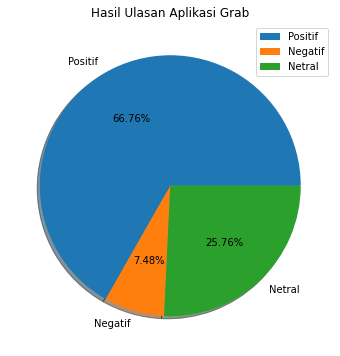

In [ ]:
import matplotlib.pyplot as plt

data_plot = pd.read_excel('Data Berlabel.xlsx')
positif = data_plot['Positif'].sum()
negatif = data_plot['Negatif'].sum()
netral = data_plot ['Netral'].sum()

label = ['Positif','Negatif','Netral']
jum = [positif,negatif,netral]

print(f'Positif: {positif}\nNegatif: {negatif}\nNetral: {netral}')

plt.figure(figsize = (6, 6))
plt.pie(jum,labels = label,autopct='%1.2f%%',shadow = True)
plt.legend()
plt.title('Hasil Ulasan Aplikasi Grab')
plt.show()

In [ ]:
token_freq = {}
for angka in stem['Hasil Stemming']:
     if angka in token_freq:
         token_freq[angka] += 1
     else:
         token_freq[angka] = 1




In [ ]:
import numpy as np

keys = list(token_freq.keys())
values = list(token_freq.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
print(sorted_dict)

{'scrol': 1, 'minum': 1, 'bgsas': 1, 'dikomen': 1, 'taruh': 1, 'kenda': 1, 'cetak': 1, 'struknya': 1, 'cakep': 1, 'gaguna': 1, 'patok': 1, 'kotor': 1, 'artinya': 1, 'rengut': 1, 'terpasang': 1, 'jahat': 1, 'propesional': 1, 'diloginin': 1, 'nagi': 1, 'hati²': 1, 'tengelamkan': 1, 'peruntukan': 1, 'fungsinya': 1, 'gercep': 1, 'safar': 1, 'respont': 1, 'menampilkan': 1, 'isntalnya': 1, 'ganteng': 1, 'bertobatlah': 1, 'bisan': 1, 'menyediakan': 1, 'kolom': 1, 'sygku': 1, 'kit': 1, 'sebelomnya': 1, 'digunain': 1, 'babang': 1, 'penjmputan': 1, 'okokokok': 1, 'buntu': 1, 'riweh': 1, 'kebingungan': 1, 'grabhealth': 1, 'dilacak': 1, 'apotekny': 1, 'ekspektasi': 1, 'keluhanan': 1, 'bntuan': 1, 'blajar': 1, 'kaji': 1, 'merakyat': 1, 'pesenam': 1, 'iui': 1, 'memper': 1, 'menyenangjan': 1, 'kecewakan': 1, 'berbohong': 1, 'aslinya': 1, 'ditnguhkn': 1, 'mantao': 1, 'liahat': 1, 'auka': 1, 'peyut': 1, 'grabhemat': 1, 'tb': 1, 'nakal': 1, 'penerima': 1, 'bngsat': 1, 'anjg': 1, 'bi': 1, 'irt': 1, 'tole

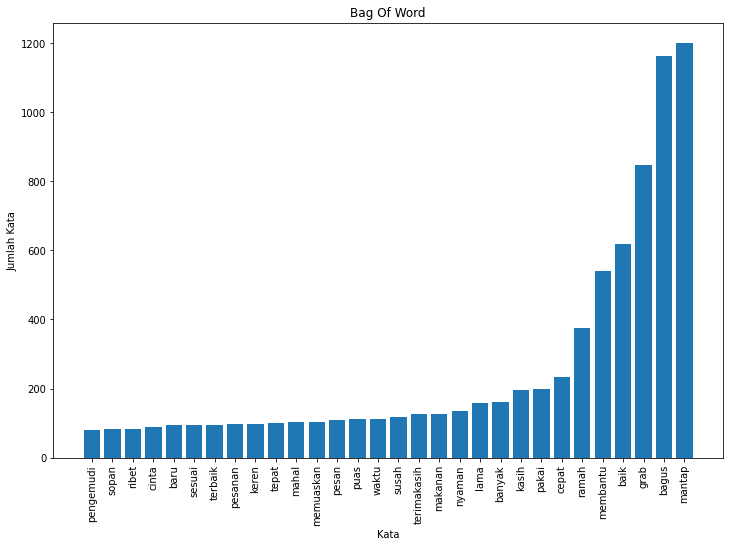

In [ ]:
keys = list(sorted_dict.keys())
values = list(sorted_dict.values())

x = keys[-30:]
y = values[-30:]
plt.figure(figsize= (12,8))
plt.bar(x, y)

plt.xlabel('Kata')
plt.ylabel('Jumlah Kata')
plt.title('Bag Of Word')

plt.xticks(rotation=90)

plt.show()

### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
y = dt['label']
y = y.astype('int')
Xtrain,Xtest,Ytrain,Ytest = train_test_split(vektor_dt,y,test_size=0.2,random_state = 0)
vektor_dt

<6848x3813 sparse matrix of type '<class 'numpy.float64'>'
	with 23826 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
model = MultinomialNB()


In [ ]:
model.fit(Xtrain,Ytrain)

MultinomialNB()

In [ ]:
ypred = model.predict(Xtest)
print('Tabel Confussion Matrix')
print(confusion_matrix(Ytest,ypred,labels=[1,0,-1]))
print('\nTabel Akurasi')
print(classification_report(Ytest,ypred))

Tabel Confussion Matrix
[[930  16   0]
 [169 159   0]
 [ 58  22  16]]

Tabel Akurasi
              precision    recall  f1-score   support

          -1       1.00      0.17      0.29        96
           0       0.81      0.48      0.61       328
           1       0.80      0.98      0.88       946

    accuracy                           0.81      1370
   macro avg       0.87      0.54      0.59      1370
weighted avg       0.82      0.81      0.78      1370



In [ ]:
import seaborn as sns

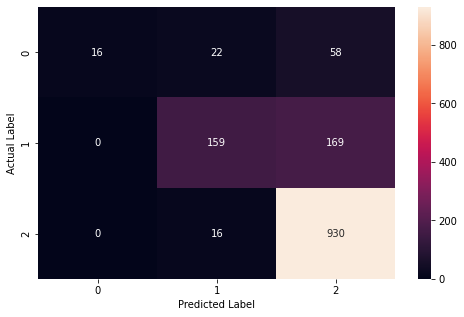

In [ ]:
f,ax = plt.subplots(figsize = (8,5))
sns.heatmap(confusion_matrix(Ytest,ypred),annot =True, fmt='.0f',ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:

print("Nilai Setiap Parameter Confusion Matrix")
print('='*50)
print('Accuracy Score:',accuracy_score(Ytest, ypred))
print("Precision Score : ",precision_score(Ytest, ypred,average= 'weighted'))
print("Recall Score : ",recall_score(Ytest, ypred,average= 'weighted'))
print('F1-Score: ',f1_score(Ytest, ypred,average = 'weighted' ))

Nilai Setiap Parameter Confusion Matrix
Accuracy Score: 0.8065693430656934
Precision Score :  0.818342003222735
Recall Score :  0.8065693430656934
F1-Score:  0.7757615323855834
